# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


---

In [21]:
urltest = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"
citytest = "Chicago"
query_urltest = f"{urltest}&q={citytest}"
responsetest = requests.get(query_urltest).json()
pprint(responsetest)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': 41.85, 'lon': -87.65},
 'dt': 1738528800,
 'id': 4887398,
 'main': {'feels_like': 3.93,
          'grnd_level': 992,
          'humidity': 78,
          'pressure': 1015,
          'sea_level': 1015,
          'temp': 6.24,
          'temp_max': 7.29,
          'temp_min': 5.66},
 'name': 'Chicago',
 'sys': {'country': 'US',
         'id': 2005153,
         'sunrise': 1738501308,
         'sunset': 1738537610,
         'type': 2},
 'timezone': -21600,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 250, 'speed': 3.09}}


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [23]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edinburgh of the seven seas
Processing Record 2 of Set 1 | papatowai
Processing Record 3 of Set 1 | malango
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | helena valley southeast
Processing Record 6 of Set 1 | olonkinbyen
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | lorengau
Processing Record 9 of Set 1 | vernon
Processing Record 10 of Set 1 | lebu
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | tralee
Processing Record 14 of Set 1 | port-aux-francais
Processing Record 15 of Set 1 | blackmans bay
Processing Record 16 of Set 1 | ormara
Processing Record 17 of Set 1 | vinton
Processing Record 18 of Set 1 | qianzhou
Processing Record 19 of Set 1 | st. john's
Processing Record 20 of Set 1 | aswan
Processing Record 21 of Set 1 | watampone
Processing Record 22 of Set 1 | bet

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edinburgh of the seven seas,-37.0676,-12.3116,18.61,88,87,11.52,SH,1738530566
1,papatowai,-46.5619,169.4708,17.40,45,41,5.39,NZ,1738530567
2,malango,-2.9627,119.9001,18.70,87,98,1.78,ID,1738530568
3,puerto natales,-51.7236,-72.4875,10.25,62,75,10.80,CL,1738530569
4,helena valley southeast,46.6153,-111.9216,-3.57,79,100,5.66,US,1738530570


In [27]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [3]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.61,88,87,11.52,SH,1738530566
1,papatowai,-46.5619,169.4708,17.40,45,41,5.39,NZ,1738530567
2,malango,-2.9627,119.9001,18.70,87,98,1.78,ID,1738530568
3,puerto natales,-51.7236,-72.4875,10.25,62,75,10.80,CL,1738530569
4,helena valley southeast,46.6153,-111.9216,-3.57,79,100,5.66,US,1738530570


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

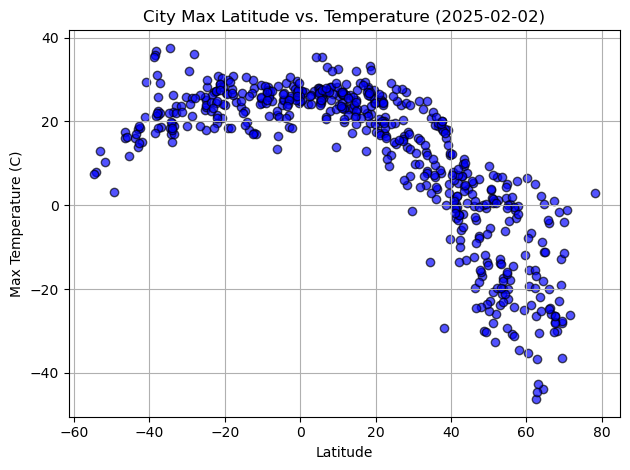

In [5]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"] , alpha = 0.675 , facecolor = 'blue' , edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2025-02-02)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

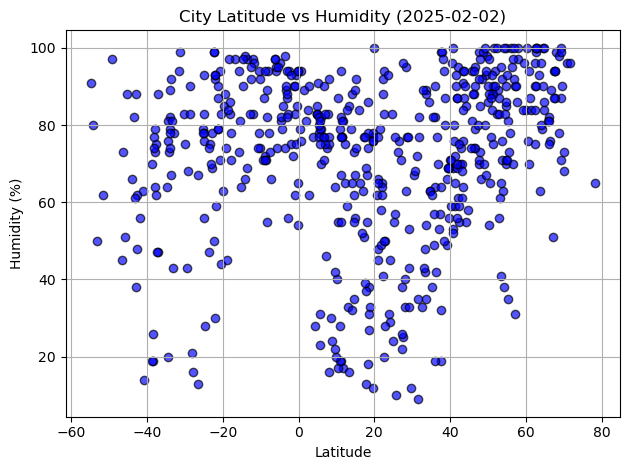

In [6]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"] , alpha = 0.675 , facecolor = 'blue' , edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity (2025-02-02)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

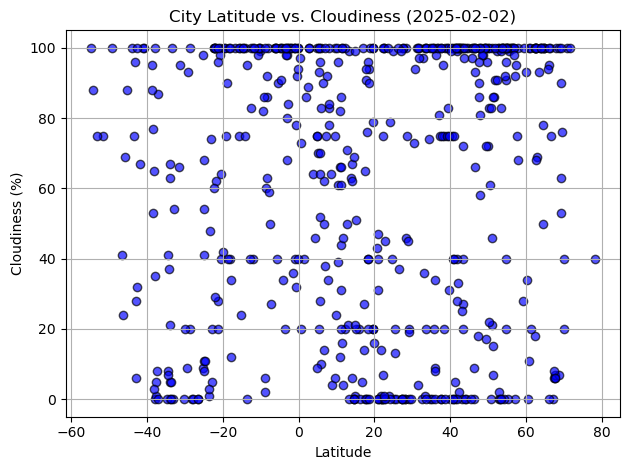

In [7]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"] , alpha = 0.675 , facecolor = 'blue' , edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2025-02-02)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

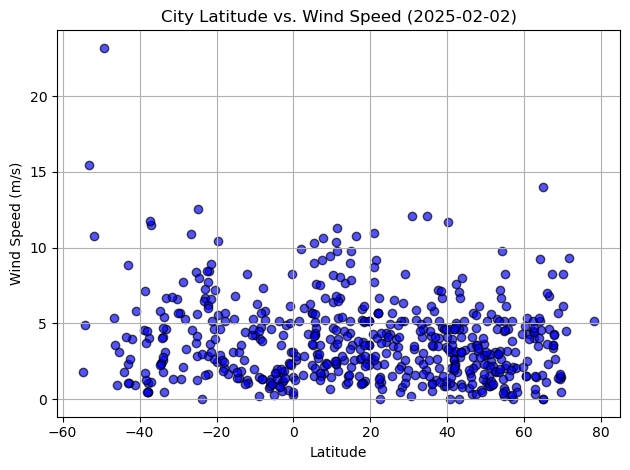

In [8]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"] , alpha = 0.675 , facecolor = 'blue' , edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2025-02-02)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [10]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,helena valley southeast,46.6153,-111.9216,-3.57,79,100,5.66,US,1738530570
5,olonkinbyen,70.9221,-8.7187,-1.21,96,100,4.50,SJ,1738530571
8,vernon,50.2581,-119.2691,-5.31,54,83,2.24,CA,1738530575
11,longyearbyen,78.2186,15.6401,2.91,65,40,5.14,SJ,1738530578
12,tralee,52.2704,-9.7026,6.65,83,99,3.13,IE,1738530579


In [11]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0 , :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,edinburgh of the seven seas,-37.0676,-12.3116,18.61,88,87,11.52,SH,1738530566
1,papatowai,-46.5619,169.4708,17.40,45,41,5.39,NZ,1738530567
2,malango,-2.9627,119.9001,18.70,87,98,1.78,ID,1738530568
3,puerto natales,-51.7236,-72.4875,10.25,62,75,10.80,CL,1738530569
6,west island,-12.1568,96.8225,27.99,83,40,8.23,CC,1738530572


In [24]:
# Define a function to create Linear Regression plots
def fullworks(feature , dataframe , hemisphere):

    indep = dataframe["Lat"]
    dep = dataframe[feature]
    
    (slope , intercept, rvalue , pvalue , stderr) = linregress(indep,dep)
    
    regress = slope * indep + intercept
    rstring = f"y = {round(slope,2)}x + {round(intercept,2)}"
    x = min(indep)
    y = min(dep)
    
    plt.scatter(indep,dep, alpha = 0.5 , facecolor = 'green' , edgecolors = 'black')
    plt.plot(indep,regress,color = 'red')
    plt.annotate(rstring,(x,y))
    plt.xlabel("Latitude")
    plt.ylabel(feature)
    plt.title(f"City Latitude ({hemisphere}) vs. {feature} (2025-02-02) with Regression")
    plt.grid()
    plt.tight_layout()
    print(f"The r^2 value is {rvalue**2}")
    plt.show()

The r^2 value is 0.14759853709769644


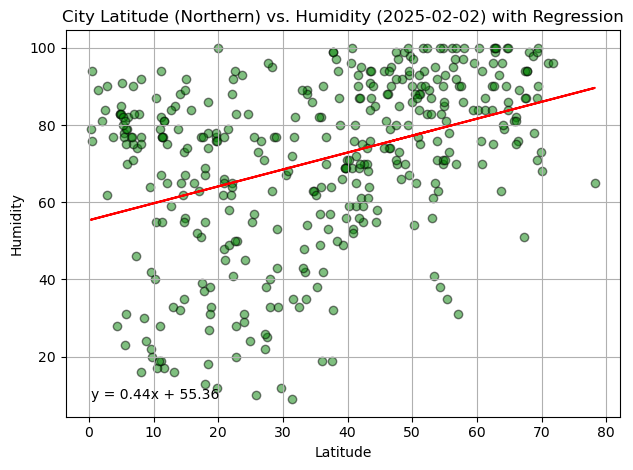

In [25]:
#Testing the Function fullworks
fullworks("Humidity" , northern_hemi_df , "Northern")

###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is 0.7352294176585705


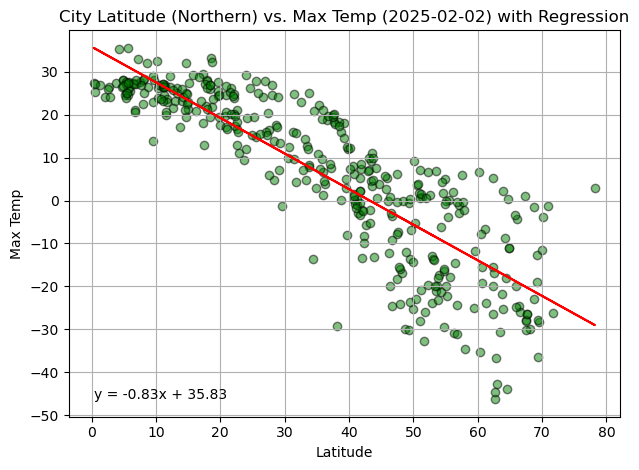

In [26]:
# Linear regression on Northern Hemisphere
fullworks("Max Temp" , northern_hemi_df , "Northern")

The r^2 value is 0.1709609981447042


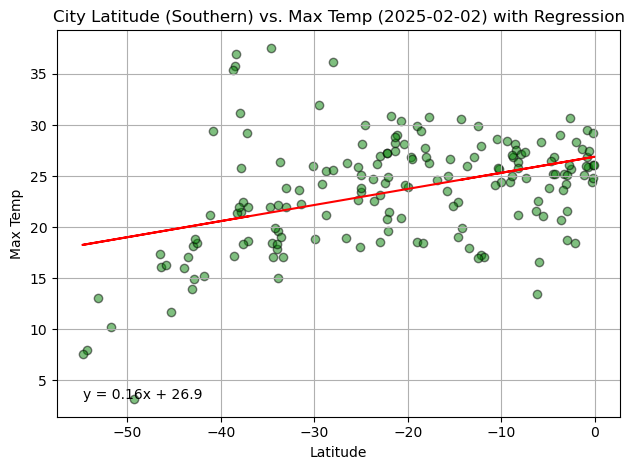

In [27]:
# Linear regression on Southern Hemisphere
fullworks("Max Temp" , southern_hemi_df , "Southern")

**Discussion about the linear relationship:** In the Northern hemisphere plot, there is a strong negative correlation between 
Temperature and Latitude. The dots are densely packed and has a high r^2 value. There is a weaker positive correlation between Temperature and Latitude on the Southern hemisphere, where the dots are less densely packed and the r^2 value is smaller.

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is 0.14759853709769644


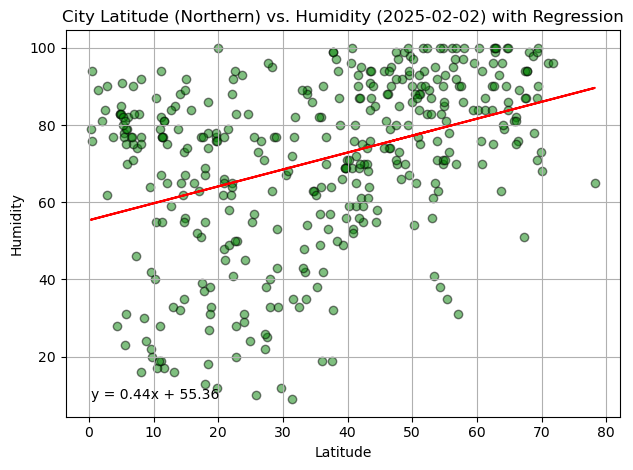

In [28]:
# Northern Hemisphere
fullworks("Humidity" , northern_hemi_df , "Northern")

The r^2 value is 0.14152749255550945


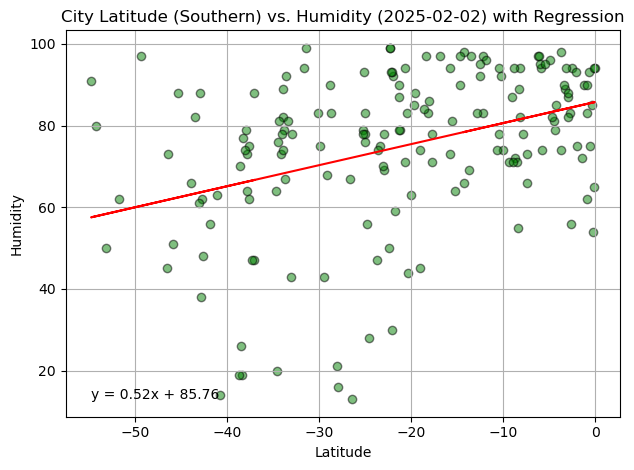

In [29]:
# Southern Hemisphere
fullworks("Humidity" , southern_hemi_df , "Southern")

**Discussion about the linear relationship:** For the Northern hemisphere plot of Latitude vs Humidity, there are weak positive correlations between the two features. Both of the r^2 values are about 0.14 which is not very strong. In addition to this, there are many outliers in the low humidities which I believe would cause a weaker relationship between the two features.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is 0.0282068249601956


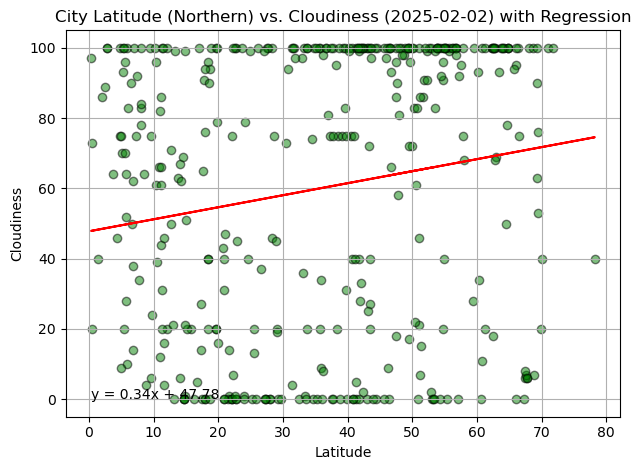

In [30]:
# Northern Hemisphere
fullworks("Cloudiness" ,northern_hemi_df , "Northern")

The r^2 value is 0.08667505839950876


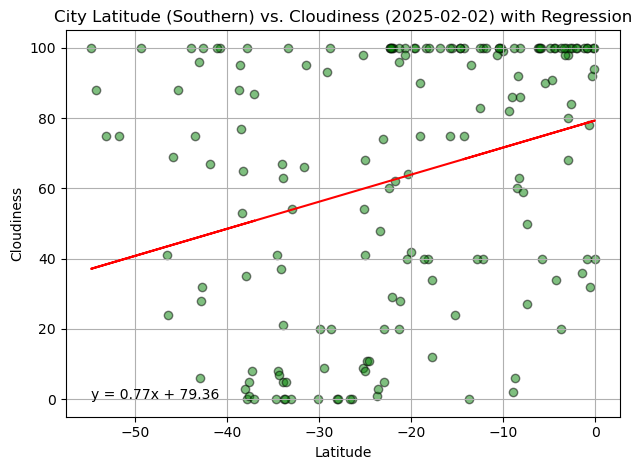

In [31]:
# Southern Hemisphere
fullworks("Cloudiness" , southern_hemi_df , "Southern")

**Discussion about the linear relationship:** Both of the r^2 values for the Northern and Southern hemisphere plots of Latitude vs Cloudiness are from 0.015 to 0.15, indicating a not very strong relationship. In addition to this, both plots have MANY outliers on the very top and the very bottom that create little clusters. Thus, although the relationship is there and is usable, it is not very strong.

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is 0.027833271443373553


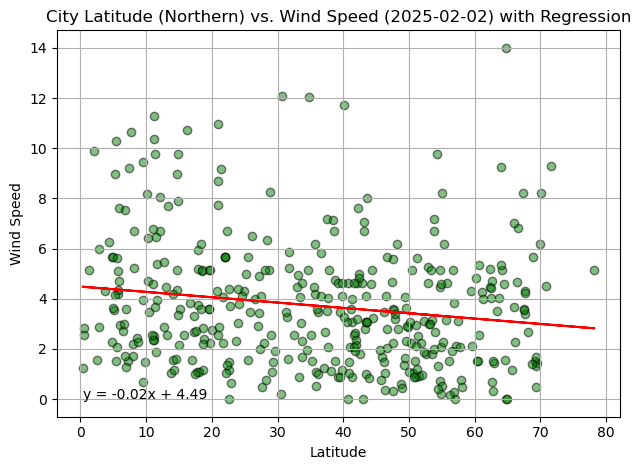

In [32]:
# Northern Hemisphere
fullworks("Wind Speed" ,northern_hemi_df , "Northern")

The r^2 value is 0.08667505839950876


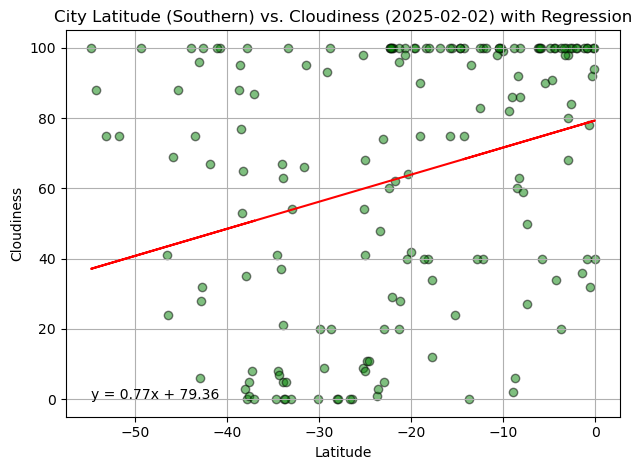

In [33]:
# Southern Hemisphere
fullworks("Cloudiness" , southern_hemi_df , "Southern")

**Discussion about the linear relationship:** The Northern hemisphere plot is reasonably well kept, with some outliers on the top of the scatterplot. The Southern hemisphere plot of Latitude and Wind Speed is more spread out. Despite this, the r^2 value for the Southern plot is about 0.08 and the Northern plot 0.02. Overall, the relationships are not very strong, even though the Northern plot for Latitude and Wind Speed looks to be pretty good.